# QBIO 401 HW 9 
## Hirad Hosseini, Fall 2023

**Next I want you to make a series of changes to the block in the middle of the notebook that
begins with the comment, “# HERE.” I want you to make the change to the code, re-run the
entire notebook, and record the total number of parameters and the percent correct
predictions on the test set. You will record these observations in the table on the next page.
Before each re-run I recommend you think about what effect you expect the change will have
(you don’t have to write your thoughts down), and then see if you were correct. Before making
the next change, undo the previous change (so each change is being analyzed separately, not
in combination with the other changes).**


**Also, since there is some randomness in fitting the neural network you likely will not get exactly
the same percent correct predictions if you re-run the same change multiple times (or compare
to your classmates). However, the general trend (e.g., a little worse than the default with no
changes, a lot worse than the default with no changes, etc.) will be consistent.
The changes I want you to make are the following:**


1. Increase the kernel_size from 12 to 36. In the convolution layer, instead of looking at 12
consecutive base pairs the code is now looking at 36 consecutive base pairs (triple the
expected length of the transcription factor).
2. Remove the Conv1D layer. (Just put the comment symbol “#” in the front of that line.)
3. Remove the Pooling layer.
4. Remove the Dense(16) layer.
5. Decrease the number of epochs (backpropagation steps to train the neural network)
from 50 to 5.

|                            | Total number parameters | Percent correct predictions |
|----------------------------|-------------------------|-----------------------------|
| No changes                 |         6226            |          0.976              |
| Increase kernel_size to 36 |         6226            |          0.94               |
| Remove Conv1D layer        |         818             |          0.688              |
| Remove Pooling             |         21586           |          0.724              |
| Remove Dense(16) layer     |         2146            |          0.978              |
| Decrease epochs to 5       |         6226            |          0.936              |

**Answer the following questions:**

A. Did any change substantially increase the number of parameters but substantially
decrease the percent correct predictions? If so, which change(s)?

B. Did any change substantially decrease the number of parameters but not have too big of
an effect on the number of correct predictions? If so, which change(s)?

C. Comment on any change where the results surprised you.

D. Make a different change to the code (you can make any change that you want, or
change multiple things at once). Explain the change you made, re-run the code, record
the total number of parameters and the percent correct predictions on the test set, and
comment on the results.

Turn in a pdf file with the table above filled out and your answers to the questions A-D. You do
not have to turn in code for this assignment.

**Question A**

Yes, removing the pooling increased the number of parameters more than three-folds but reduced the percent of correct predictions from 0.976 to 0.724.

**Question B**

Yes, removing the Dense(16) layer nearly reduced the total number of parameters by a factor of 3 but resulted in a comparable proportion correct predictions of 0.978.

**Question C**



**Question D**

**This last assignment is a little different than the previous assignments. Rather than writing
original code, you are going to modify the code I have posted along with this assignment,
“HW9_script.ipynb.” This code is similar to the code accompanying the paper, “Primer on deep
learning in genomics.”
If you have not done so already, you will probably first have to install TensorFlow on your
computer. In a terminal type the following:**


pip install –upgrade pip
pip install tensorflow


**First I want you to run the code and record the total number of parameters and the percent
correct predictions on the test set. The total number of parameters is in the output of
“model.summary()” near the end of the notebook. The percent correct predictions on the test
set is the last output of the notebook.**

In [1]:
!pip install --upgrade pip

In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

SEQUENCES_URL = 'https://raw.githubusercontent.com/abidlabs/deep-learning-genomics-primer/master/sequences.txt'

sequences = requests.get(SEQUENCES_URL).text.split('\n')
sequences = list(filter(None, sequences))  # This removes empty sequences.

# Let's print the first few sequences.
pd.DataFrame(sequences, index=np.arange(1, len(sequences)+1), 
             columns=['Sequences']).head()

,Sequences
1,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
2,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
3,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
4,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
5,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CCGAGGGCTA ... CGCGGACACC
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
LABELS_URL = 'https://raw.githubusercontent.com/abidlabs/deep-learning-genomics-primer/master/labels.txt'

labels = requests.get(LABELS_URL).text.split('\n')
labels = list(filter(None, labels))  # removes empty sequences

one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [['0' '0' '0' ... '0' '1' '1']]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]


In [6]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

In [7]:
#HERE
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, AveragePooling1D
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

history = model.fit(train_features, train_labels, 
                    epochs=5, verbose=0, validation_split=0.25)

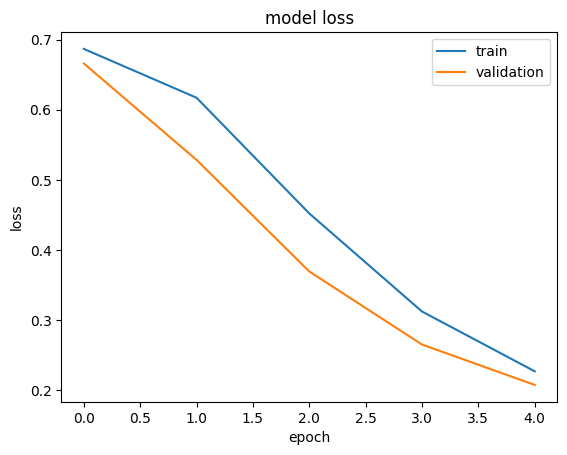

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

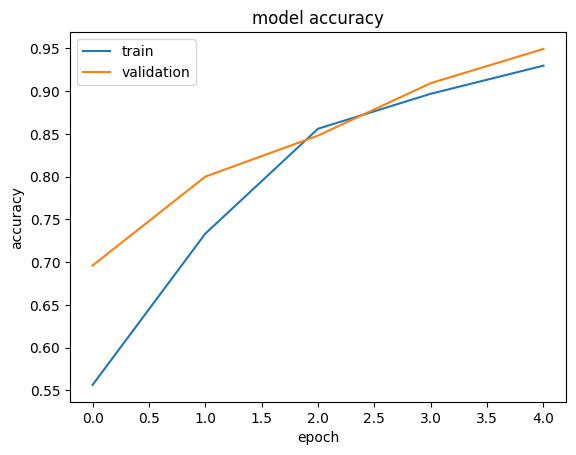

In [9]:
plt.figure()
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 32)            1568      
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 16)                4624      
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 6226 (24.32 KB)
Trainable params: 6226 (24.32 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [11]:
predicted_labels = model.predict(np.stack(test_features))
np.mean(np.argmax(test_labels, axis=1)==np.argmax(predicted_labels, axis=1))

16/16 [==============================] - 0s 512us/step


0.936